## Pytorch spatial tranformer Example
See also https://github.com/fxia22/stn.pytorch
Note that torch.nn.functional.affine_grid and torch.nn.functional.grid_sample only in Pytorch v0.2.0 or above

In [2]:
%matplotlib inline
import torch
import torch.nn as nn
from PIL import Image
from matplotlib import mlab
import matplotlib.pyplot as plt
import numpy as np
from scipy import ndimage

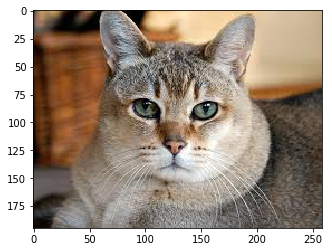

In [3]:
img = Image.open('cat.jpg').convert('RGB')
img = np.array(img)/255.0
plt.imshow(img)

In [4]:
var_image = torch.autograd.Variable(torch.from_numpy(img))
var_image.size()

torch.Size([195, 259, 3])

In [5]:
var_image_reshape = var_image.view(1, var_image.size(0),var_image.size(1),var_image.size(2))
var_image_reshape = var_image_reshape.transpose(2,3).transpose(1,2)
var_image_reshape.size()

torch.Size([1, 3, 195, 259])

torch.Size([2, 3])
torch.Size([1, 2, 3])
Variable containing:
( 0 , 0 ,.,.) = 
 -1.0000 -1.0000
 -0.9922 -1.0000
 -0.9845 -1.0000
       ⋮        
  0.9845 -1.0000
  0.9922 -1.0000
  1.0000 -1.0000

( 0 , 1 ,.,.) = 
 -1.0000 -0.9897
 -0.9922 -0.9897
 -0.9845 -0.9897
       ⋮        
  0.9845 -0.9897
  0.9922 -0.9897
  1.0000 -0.9897

( 0 , 2 ,.,.) = 
 -1.0000 -0.9794
 -0.9922 -0.9794
 -0.9845 -0.9794
       ⋮        
  0.9845 -0.9794
  0.9922 -0.9794
  1.0000 -0.9794
    ... 

( 0 ,192,.,.) = 
 -1.0000  0.9794
 -0.9922  0.9794
 -0.9845  0.9794
       ⋮        
  0.9845  0.9794
  0.9922  0.9794
  1.0000  0.9794

( 0 ,193,.,.) = 
 -1.0000  0.9897
 -0.9922  0.9897
 -0.9845  0.9897
       ⋮        
  0.9845  0.9897
  0.9922  0.9897
  1.0000  0.9897

( 0 ,194,.,.) = 
 -1.0000  1.0000
 -0.9922  1.0000
 -0.9845  1.0000
       ⋮        
  0.9845  1.0000
  0.9922  1.0000
  1.0000  1.0000
[torch.FloatTensor of size 1x195x259x2]

torch.Size([1, 195, 259, 2])
torch.Size([1, 3, 195, 259])


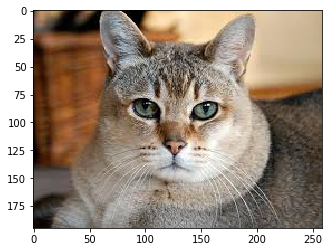

In [6]:
# notice that is has to be dtype=np.float32
indentity_theta = torch.autograd.Variable(torch.from_numpy(np.array([[1, 0, 0], [0, 1, 0]], dtype=np.float32)))
print(indentity_theta.size())
indentity_theta = indentity_theta.view(1,indentity_theta.size(0),indentity_theta.size(1))
print(indentity_theta.size())
grid = torch.nn.functional.affine_grid(indentity_theta, var_image_reshape.size())
print(grid)
print(grid.size())
out_image = torch.nn.functional.grid_sample(var_image_reshape,grid.double())
print(out_image.size())
#Reshape channel for imshow
out_image_np = out_image.data.numpy()
out_image_np = np.squeeze(out_image_np)
out_image_np = out_image_np.transpose([1,2,0])
plt.imshow(out_image_np)

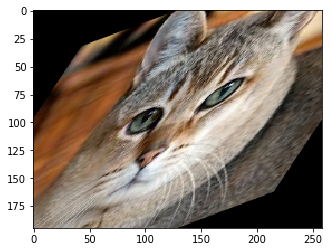

In [7]:
# notice that is has to be dtype=np.float32
indentity_theta = torch.autograd.Variable(torch.from_numpy(np.array([[1, 0.5, 0], [0.5, 1, 0]], dtype=np.float32)))
indentity_theta = indentity_theta.view(1,indentity_theta.size(0),indentity_theta.size(1))
grid = torch.nn.functional.affine_grid(indentity_theta, var_image_reshape.size())
out_image = torch.nn.functional.grid_sample(var_image_reshape,grid.double())
#Reshape channel for imshow
out_image_np = out_image.data.numpy()
out_image_np = np.squeeze(out_image_np)
out_image_np = out_image_np.transpose([1,2,0])
plt.imshow(out_image_np)

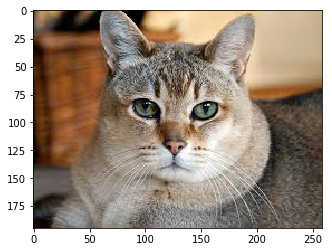

In [8]:
x = np.linspace(-1, 1, 259)
y = np.linspace(-1, 1, 195)
xv, yv = np.meshgrid(x, y)
a = np.dstack((xv, yv))
grid = np.expand_dims(a, 0)
grid = torch.autograd.Variable(torch.from_numpy(grid))
out_image = torch.nn.functional.grid_sample(var_image_reshape, grid.double())
#Reshape channel for imshow
out_image_np = out_image.data.numpy()
out_image_np = np.squeeze(out_image_np)
out_image_np = out_image_np.transpose([1,2,0])
plt.imshow(out_image_np)

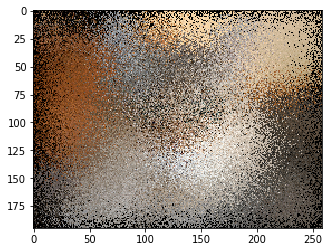

In [10]:
x = np.linspace(-1, 1, 259)
y = np.linspace(-1, 1, 195)
xv, yv = np.meshgrid(x, y)
a = np.dstack((xv, yv))
grid = np.expand_dims(a, 0)
b = np.random.normal(0, 0.1, (1, 195, 259, 2))
grid = grid + b
grid = torch.autograd.Variable(torch.from_numpy(grid))
out_image = torch.nn.functional.grid_sample(var_image_reshape, grid.double())
#Reshape channel for imshow
out_image_np = out_image.data.numpy()
out_image_np = np.squeeze(out_image_np)
out_image_np = out_image_np.transpose([1,2,0])
plt.imshow(out_image_np)